In [638]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [639]:
# List of years wanted that have CSV files
years = [2018, 2019, 2020, 2021, 2022]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each year and read the corresponding CSV file
for year in years:
    file_path = Path(f"Output_data/Final_combined/{year}_quarter_combined.csv")
    if file_path.exists():
        year_data = pd.read_csv(file_path)
        combined_data = pd.concat([combined_data, year_data])

# Pivot the data to have one row per suburb and all the sales data for each year
pivot_columns = ['Number ID', 'City', 'Suburb'] \
+ [f'Sales Q{i} {year}' for year in years for i in range(1, 5)] \
+ [f'Median Q{i} {year}' for year in years for i in range(1, 5)]
combined_data_pivot = combined_data[pivot_columns].groupby(['Number ID', 'City', 'Suburb']).sum().reset_index()

# Fill NaN values with 0
combined_data_pivot.fillna(0, inplace=True)

# Save the combined data to a new CSV file
combined_data_pivot.to_csv("Output_data/Final_combined_2018-2022/raw_2018_to_2022_combined.csv", index=False)

# Print the modified combined data
combined_data_pivot

,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
0,0,ADELAIDE,ADELAIDE,5.0,5.0,1.0,4.0,4.0,4.0,4.0,...,671000.0,864750.0,1013000.0,1300000.0,1012500.0,1400000.0,1266250.0,940000.0,853000.0,1400000.0
1,1,ADELAIDE,NORTH ADELAIDE,2.0,6.0,9.0,9.0,10.0,6.0,12.0,...,1025000.0,1600000.0,1410000.0,1608000.0,1250000.0,1247500.0,1617500.0,1300000.0,1100500.0,1325000.0
2,2,ADELAIDE HILLS,ALDGATE,17.0,15.0,6.0,9.0,16.0,15.0,9.0,...,730000.0,863750.0,875000.0,971000.0,875000.0,1287500.0,870000.0,982000.0,1230000.0,1170000.0
3,3,ADELAIDE HILLS,ASHTON,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,940000.0,530000.0,765000.0,0.0,0.0,0.0,0.0,900000.0
4,4,ADELAIDE HILLS,BASKET RANGE,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,725000.0,800000.0,0.0,0.0,0.0,785000.0,783000.0,875000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,519,MOUNT BARKER,KANMANTOO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,471500.0
608,520,MOUNT BARKER,MACCLESFIELD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,611000.0
609,521,MOUNT BARKER,MEADOWS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645000.0
610,522,MOUNT BARKER,MOUNT BARKER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,624000.0


In [640]:
# Identify if there are duplicate entries based on 'Suburb'
duplicate_mask = combined_data_pivot.duplicated(subset=['Suburb'], keep=False)

# Display duplicate rows
duplicate_rows = combined_data_pivot[duplicate_mask]
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
5,5,ADELAIDE HILLS,BELAIR,14.0,14.0,9.0,19.0,15.0,17.0,18.0,...,665000.0,668000.0,810000.0,910000.0,815000.0,950000.0,1072500.0,975000.0,816000.0,963000.0
11,13,ADELAIDE HILLS,CRAFERS WEST,5.0,8.0,3.0,3.0,6.0,5.0,2.0,...,947500.0,650000.0,702500.0,678500.0,847250.0,1056000.0,725000.0,845500.0,1243000.0,887625.0
14,19,ADELAIDE HILLS,IRONBANK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,937000.0,0.0,580000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,27,ADELAIDE HILLS,ROSTREVOR,32.0,38.0,23.0,26.0,31.0,33.0,25.0,...,662500.0,650000.0,668800.0,746250.0,755000.0,897500.0,840000.0,952500.0,897000.0,861000.0
25,30,ADELAIDE HILLS,STONYFELL,4.0,3.0,7.0,2.0,3.0,12.0,2.0,...,925000.0,870000.0,1220094.0,1400000.0,1123750.0,1625000.0,1350000.0,1158500.0,1500000.0,1300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,477,WEST TORRENS,WEST BEACH,13.0,12.0,14.0,13.0,16.0,14.0,13.0,...,805000.0,875000.0,899500.0,1183000.0,1105000.0,1025000.0,0.0,0.0,0.0,0.0
589,478,WEST TORRENS,WEST BEACH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1020000.0,1065000.0,1086250.0,0.0
590,478,WEST TORRENS,WEST RICHMOND,7.0,2.0,1.0,2.0,4.0,5.0,6.0,...,475500.0,388500.0,527500.0,485500.0,562000.0,680438.0,0.0,0.0,0.0,0.0
591,479,WEST TORRENS,WEST RICHMOND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,525000.0,745000.0,733000.0


In [641]:
# Check any suburb in dupicate_rows DataFrame to confirm duplicates
duplicate_data = combined_data_pivot[combined_data_pivot['Suburb'] == 'UNLEY']
duplicate_data

,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
532,446,UNLEY,UNLEY,9.0,9.0,7.0,11.0,7.0,10.0,3.0,...,1270000.0,894000.0,1325000.0,1192500.0,1760000.0,2100000.0,0.0,0.0,0.0,0.0
533,447,UNLEY,UNLEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1727500.0,1417500.0,1950000.0,1965000.0


In [642]:
# Remove duplicates
combined_data_cleaned = combined_data_pivot.drop_duplicates(subset=['Suburb'])

# Display cleaned DataFrame
print("Cleaned DataFrame:")
combined_data_cleaned

Cleaned DataFrame:


,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
0,0,ADELAIDE,ADELAIDE,5.0,5.0,1.0,4.0,4.0,4.0,4.0,...,671000.0,864750.0,1013000.0,1300000.0,1012500.0,1400000.0,1266250.0,940000.0,853000.0,1400000.0
1,1,ADELAIDE,NORTH ADELAIDE,2.0,6.0,9.0,9.0,10.0,6.0,12.0,...,1025000.0,1600000.0,1410000.0,1608000.0,1250000.0,1247500.0,1617500.0,1300000.0,1100500.0,1325000.0
2,2,ADELAIDE HILLS,ALDGATE,17.0,15.0,6.0,9.0,16.0,15.0,9.0,...,730000.0,863750.0,875000.0,971000.0,875000.0,1287500.0,870000.0,982000.0,1230000.0,1170000.0
3,3,ADELAIDE HILLS,ASHTON,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,940000.0,530000.0,765000.0,0.0,0.0,0.0,0.0,900000.0
4,4,ADELAIDE HILLS,BASKET RANGE,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,725000.0,800000.0,0.0,0.0,0.0,785000.0,783000.0,875000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,519,MOUNT BARKER,KANMANTOO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,471500.0
608,520,MOUNT BARKER,MACCLESFIELD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,611000.0
609,521,MOUNT BARKER,MEADOWS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645000.0
610,522,MOUNT BARKER,MOUNT BARKER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,624000.0


In [643]:
# Check if cleaned DataFrame contains duplicate rows
duplicate_data = combined_data_cleaned[combined_data_pivot['Suburb'] == 'UNLEY'] 
duplicate_data

/var/folders/ms/mhrlvgms21l0_mzclg4mnp5w0000gn/T/ipykernel_8298/3834276284.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_data = combined_data_cleaned[combined_data_pivot['Suburb'] == 'UNLEY']


,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
532,446,UNLEY,UNLEY,9.0,9.0,7.0,11.0,7.0,10.0,3.0,...,1270000.0,894000.0,1325000.0,1192500.0,1760000.0,2100000.0,0.0,0.0,0.0,0.0


In [644]:
# Save combined_data_cleaned to a new CSV file
combined_data_cleaned.to_csv("Output_data/Final_combined_2018-2022/cleaned_2018_to_2022_combined.csv", index=False)

In [645]:
# Suburbs wanted for plots
suburbs_of_interest = ['NORWOOD', 'BURNSIDE'] # (Personal note) Add Burnside to suburbs if wanting to make scatter plot

# Filter the DataFrame to include only the desired suburbs
desired_suburbs_data = combined_data_cleaned[combined_data_cleaned['Suburb'].isin(suburbs_of_interest)]

# Print the filtered and modified data
desired_suburbs_data

,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
35,40,BURNSIDE,BURNSIDE,10.0,12.0,9.0,17.0,6.0,4.0,11.0,...,825000.0,924000.0,1107500.0,1200000.0,1000000.0,1522000.0,1470000.0,1750500.0,1380000.0,1450000.0
202,213,NORWOOD PAYNEHAM & ST PETERS,NORWOOD,10.0,16.0,6.0,13.0,13.0,11.0,17.0,...,1070000.0,1190000.0,1025000.0,1047500.0,1365000.0,1350000.0,1700000.0,1406000.0,1525000.0,1250000.0


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


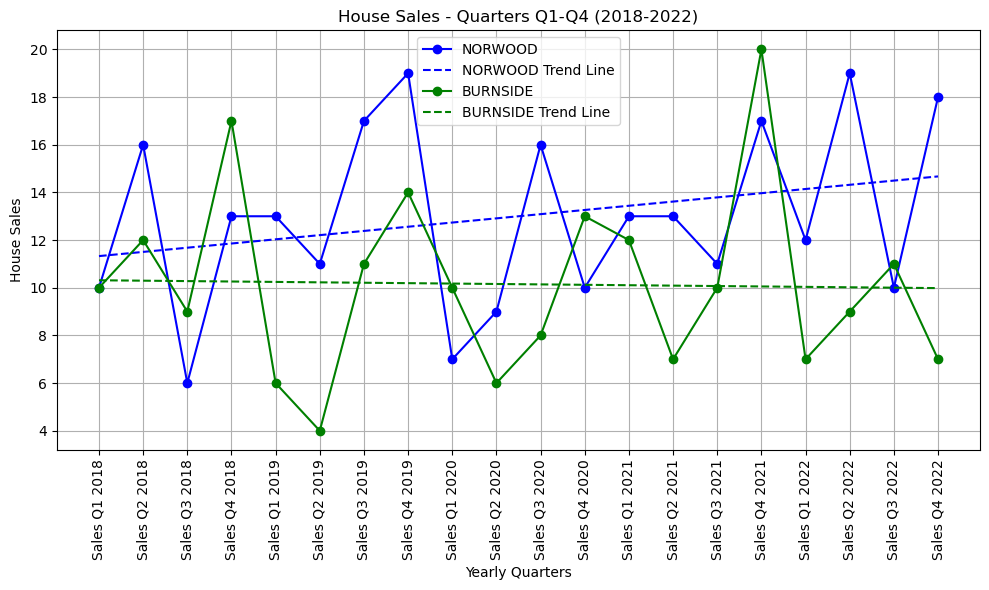

In [646]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define a list of colors for each suburb
colors = ['blue', 'green']  # Add more colors as needed

# Iterate over each suburb and its corresponding color
for i, suburb in enumerate(suburbs_of_interest):
    suburb_data = desired_suburbs_data[desired_suburbs_data['Suburb'] == suburb]
    
    # Extract the sales data for the x-axis (all years)
    x_values = [f'Sales Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    
    # Extract the data for the specific suburb
    y_values = suburb_data[x_values].values.flatten()

    # Calculate and add trend line
    slope, intercept, _, _, _ = linregress(range(len(y_values)), y_values)
    trend_line = [slope * x + intercept for x in range(len(y_values))]
    
    # Plot the data and trend line for the current suburb with its designated color
    plt.plot(x_values, y_values, marker='o', color=colors[i], label=suburb)
    plt.plot(x_values, trend_line, color=colors[i], linestyle='--', label=f'{suburb} Trend Line')

# Configure plot settings
plt.xlabel('Yearly Quarters')
plt.ylabel('House Sales')
plt.title('House Sales - Quarters Q1-Q4 (2018-2022)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig(f'Output_data/Plots/jordan_all_suburbs_house_sales_line_plot.png')

# Show plot
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


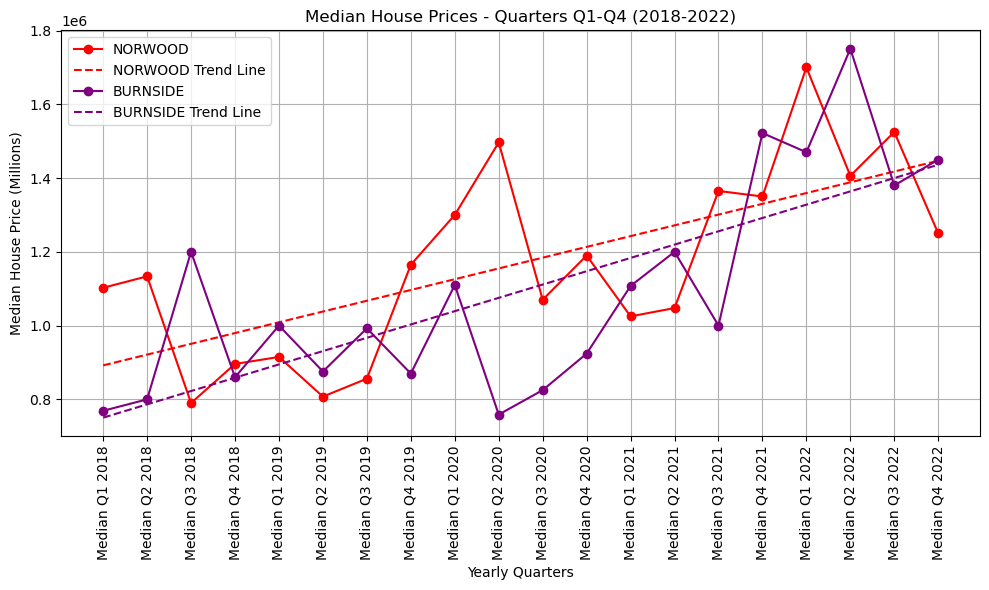

In [647]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define a list of colors for each suburb
colors = ['red', 'purple']  # Add more colors as needed

# Iterate over each suburb and its corresponding color
for i, suburb in enumerate(suburbs_of_interest):
    suburb_data = desired_suburbs_data[desired_suburbs_data['Suburb'] == suburb]
    
    # Extract the median data for the x-axis (all years)
    x_values = [f'Median Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    
    # Extract the data for the specific suburb
    y_values = suburb_data[x_values].values.flatten()

    # Calculate and add trend line
    slope, intercept, _, _, _ = linregress(range(len(y_values)), y_values)
    trend_line = [slope * x + intercept for x in range(len(y_values))]
    
    # Plot the data and trend lines for the current suburb with its designated color
    plt.plot(x_values, y_values, marker='o', color=colors[i], label=suburb)
    plt.plot(x_values, trend_line, color=colors[i], linestyle='--', label=f'{suburb} Trend Line')

# Configure plot settings
plt.xlabel('Yearly Quarters')
plt.ylabel('Median House Price (Millions)')
plt.title('Median House Prices - Quarters Q1-Q4 (2018-2022)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig(f'Output_data/Plots/jordan_all_suburbs_median_house_prices_line_plot.png')

# Show plot
plt.show()


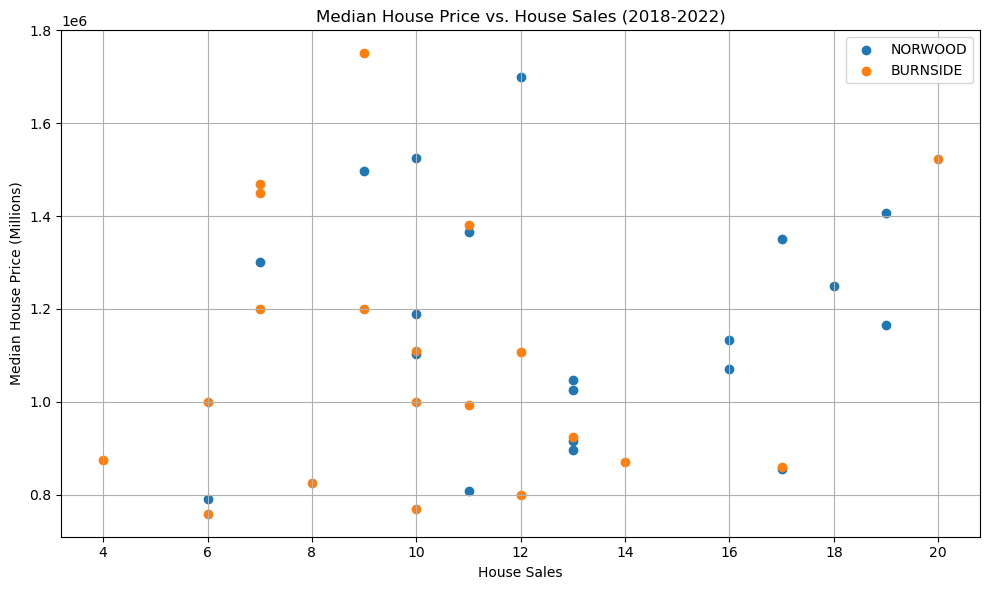

In [648]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Iterate over each suburb
for suburb in suburbs_of_interest:
    suburb_data = desired_suburbs_data[desired_suburbs_data['Suburb'] == suburb]
    
    # Extract the median and sales data for the x-axis (all years)
    x_values = [f'Median Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    median_values = suburb_data[x_values].values.flatten()
    
    sales_x_values = [f'Sales Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    sales_values = suburb_data[sales_x_values].values.flatten()

    # Configure scatter plot
    plt.scatter(sales_values, median_values, label=suburb, marker='o')

# Configure plot settings
plt.xlabel('House Sales')
plt.ylabel('Median House Price (Millions)')
plt.title('Median House Price vs. House Sales (2018-2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig('Output_data/Plots/jordan_all_suburbs_median_vs_sales_scatter_plot.png')

# Show plot
plt.show()


In [649]:
# ONE SUBURB HOUSE SALES LINE PLOT

# # House sales plotting code
# for suburb in suburbs_of_interest:
#     plt.figure(figsize=(10, 6))
#     suburb_data = desired_suburbs_data[desired_suburbs_data['Suburb'] == suburb]
    
#     # Extract the sales data for the x-axis (all years)
#     x_values = [f'Sales Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    
#     # Extract the data for the specific suburb
#     y_values = suburb_data[x_values].values.flatten()
    
#     # Configure plot to desired preferences
#     plt.plot(x_values, y_values, marker='o', color='darkblue', label=suburb)
#     plt.xlabel('Yearly Quarters')
#     plt.ylabel('House Sales')
#     plt.title(f'House Sales for {suburb} - Quarters Q1-Q4 (2018-2022)')
#     plt.xticks(rotation=90)

#     # Calculate and add trend line
#     slope, intercept, r_value, p_value, std_err = linregress(range(len(y_values)), y_values)
#     trend_line = [slope * x + intercept for x in range(len(y_values))]
#     plt.plot(x_values, trend_line, color='red', linestyle='--', label='Trend Line')

#     # Calculate future trend line values for each quarter of the future years
#     future_years = range(2023, 2026)  # Adjust the range as needed
#     future_values = [slope * (len(x_values) + i) + intercept for i in range(len(future_years) * 4)]
#     future_x_values = [f'Sales Q{j} {year}' for year in future_years for j in range(1, 5)]
#     plt.plot(future_x_values, future_values, color='green', linestyle='--', label='Predicted Trend Line (Future)')

#     # Display with legend, tight layout and grid
#     plt.legend()
#     plt.tight_layout()
#     plt.grid(True)
    
#     # Save plot
#     # plt.savefig(f'Output_data/Plots/{suburb}_house_sales_line_plot.png')

#     # Show plot
#     plt.show()

In [650]:
# ONE SUBURB MEDIAN HOUSE PRICE LINE PLOT

# # Median house prices plotting code
# for suburb in suburbs_of_interest:
#     plt.figure(figsize=(10, 6))
#     suburb_data = desired_suburbs_data[desired_suburbs_data['Suburb'] == suburb]
    
#     # Extract the median data for the x-axis (all years)
#     x_values = [f'Median Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    
#     # Extract the data for the specific suburb
#     y_values = suburb_data[x_values].values.flatten()

#     # Configure plot to desired preferences
#     plt.plot(x_values, y_values, marker='o', color='darkblue', label=suburb)
#     plt.xlabel('Yearly Quarters')
#     plt.ylabel('Median House Price (Millions)')
#     plt.title(f'Median House Prices for {suburb} - Quarters Q1-Q4 (2018-2022)')
#     plt.xticks(rotation=90)

#     # Calculate and add trend line
#     slope, intercept, r_value, p_value, std_err = linregress(range(len(y_values)), y_values)
#     trend_line = [slope * x + intercept for x in range(len(y_values))]
#     plt.plot(x_values, trend_line, color='red', linestyle='--', label='Trend Line')

#     # Calculate future trend line values for each quarter of the future years
#     future_years = range(2023, 2026)  # Adjust the range as needed
#     future_values = [slope * (len(x_values) + i) + intercept for i in range(len(future_years) * 4)]
#     future_x_values = [f'Median Q{j} {year}' for year in future_years for j in range(1, 5)]
#     plt.plot(future_x_values, future_values, color='green', linestyle='--', label='Predicted Trend Line (Future)')
    
#     # Display with legend, tight layout and grid
#     plt.legend()
#     plt.tight_layout()
#     plt.grid()

#     # Save plot
#     # plt.savefig(f'Output_data/Plots/{suburb}_median_house_prices_line_plot.png')

#     # Show plot
#     plt.show()

In [651]:
# ONE SUBURB MEDIAN HOUSE PRICE VS. HOUSE SALES SCATTER PLOT

# # Scatter plot comparing median house price and house sales
# for suburb in suburbs_of_interest:
#     plt.figure(figsize=(10, 6))
#     suburb_data = desired_suburbs_data[desired_suburbs_data['Suburb'] == suburb]
    
#     # Extract the median and sales data for the x-axis (all years)
#     x_values = [f'Median Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
#     median_values = suburb_data[x_values].values.flatten()
    
#     sales_x_values = [f'Sales Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
#     sales_values = suburb_data[sales_x_values].values.flatten()

#     # Configure scatter plot
#     plt.scatter(sales_values, median_values, color='darkblue', label=suburb, marker='o')
#     plt.xlabel('House Sales')
#     plt.ylabel('Median House Price (Millions)')
#     plt.title(f'Scatter Plot: Median House Price vs. House Sales for {suburb} (2018-2022)')
#     plt.legend()
#     plt.grid()
#     plt.tight_layout()

#     # Save plot
#     # plt.savefig(f'Output_data/Plots/{suburb}_median_vs_sales_scatter_plot.png')

#     # Show plot
#     plt.show()